In [1]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it

In [5]:
world = World(state_size = 10, time = 300, agent=["model_alt", "model_alt"], memory=[1, 1], behav_control=[1, 1], model_var=[0,0])
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

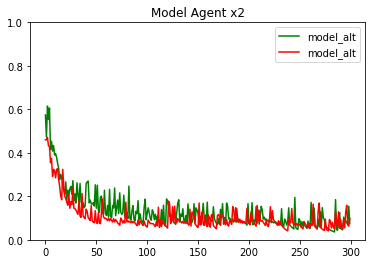

In [6]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()

In [57]:
world = World(state_size=4, agent=['chaos','dummy'], time=22, seed=11)
world.create_agents()
world.run()
agents = world.get_agents()
costs = world.get_costs()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(costs[0]))]

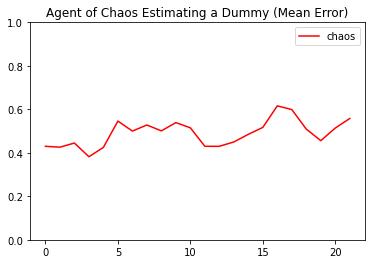

In [59]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'r', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Agent of Chaos Estimating a Dummy (Mean Error)")
plt.show()

In [61]:
world = World(state_size=4, agent=['prediction','dummy'], time=22, seed=11)
world.create_agents()
world.run()
agents = world.get_agents()
costs = world.get_costs()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(costs[0]))]

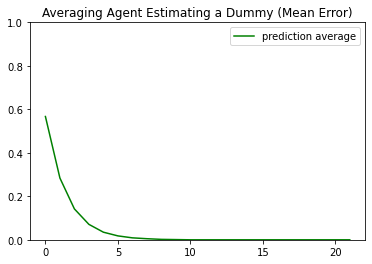

In [62]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.ylim([0, 1])
plt.legend()
plt.title("Averaging Agent Estimating a Dummy (Mean Error)")
plt.show()


 Agents Averaging their Past Predictions: time steps=20, memory=5, varied state size


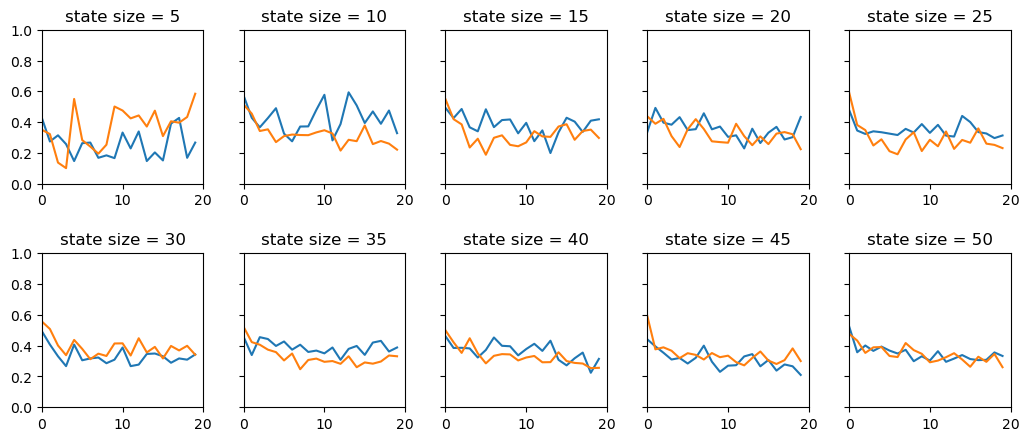

In [54]:
w = 2.5; h = 2.5
ncols = 5
nrows = 2
param_vals = [i*5 for i in range(1, ncols*nrows+1)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 20
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = param, time = t, agent=["prediction", "prediction"], memory=[4, 4])
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0])
    ax[ai].plot(time, costs[1])
    ax[ai].set_title('state size = %.0f'%param)
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Agents Averaging their Past Predictions: time steps=20, memory=5, varied state size")
plt.show()

### When does error cease to improve?

### How quickly does it plateau?

In [12]:
def convergence_test(x, epsilon=0.1, var=.8):
    '''
    takes:
    x         a list of values
    epsilon   a threshold of error change
    var       a proportion of transitions that must remain within
    
    An asymptote means that a proportion (var) of steps are less than
    the threshold (epsilon). Asymptotes must last at least 10% of timesteps 
    
    returns steps to convergence & plateau
    '''
    # when do we hit an asymptote?
    times_converged = []
    # where does error locally plateau?
    asymptotes = []
    # how long must an asymptote be?
    a_len = int(len(x) * .1)
    # are we on an asymptote?
    on_asymptote = False 
    # start of an asymptote
    a_start = 0
    # record of passed threshold tests
    c = []
    # check difference in error for each timestep
    for i in range(len(x)-1):
        j = i+1
        # error improved less than the threshold
        if x[j] - x[i] < epsilon:
            # current timestep passed
            c.append(1)
            if not on_asymptote:
                if i >= a_len:
                    # if we are not on an asymptote and not just starting, increment start
                    a_start += 1
                # verify if we are on asymptote
                on_asymptote = check_convergence(c[a_start:i], var)
            elif not check_convergence(c[a_start, i]):
                #
                if i >= a_len:
                    # no longer on asymptote
                    times_converged.append(a_start)
                    e_avg = sum(x[a_start:i])/len(x[a_start:i])
                    asympototes.append(e_avg)
                    a_start += 1                                    
        else:
            # current timestep failed
            c.append(0)
            on_asymptote = check_convergence(c[a_start:i], var)
            if not on_asymptote and i >= a_len:
                # increment start if not at beginning
                a_start += 1 
                
    return times_converged, asymptotes    

def check_convergence(c, var):
    '''
    takes:
    c      list of binary values indicating error below threshold
    var    proporiton of values that need to be below the threshold
    
    returns boolean indicating convergence
    '''
    avg_c = sum(c)/len(c)
    return avg_c >= var

In [13]:
con, asy = convergence_test(costs[0])
print(con)
print('\n')
print(asy)

ZeroDivisionError: division by zero